In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile,chi2
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
data1=load_breast_cancer()
X=data1.data
y=data1.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [5]:
print(data1.feature_names)
print(data1.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


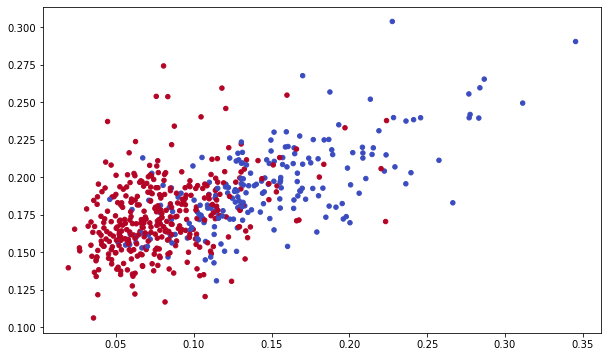

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 5], X[:, 8], c=y, cmap=plt.cm.coolwarm, s=20)

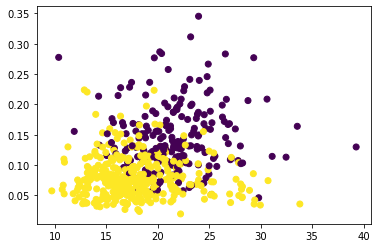

In [103]:
plt.scatter(X[:,1],X[:,5],c=y)

([<matplotlib.patches.Wedge at 0x13fe93a07c0>,
 [Text(-1.013042480299073, 0.42865479480521707, 'malignant'),
  Text(1.01304244016551, -0.4286548896530975, 'benign')],
 [Text(-0.5525686256176761, 0.2338117062573911, '37.3%'),
  Text(0.5525686037266418, -0.23381175799259862, '62.7%')])

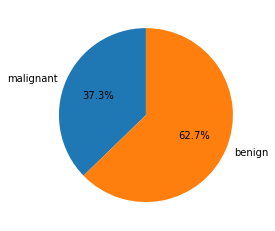

In [101]:
mal = list(data1.target_names).index('malignant')
ben = list(data1.target_names).index('benign')
plt.figsize=(10, 6)
plt.pie([len(y[y==mal]), len(y[y==ben])], labels=data1.target_names, autopct='%1.1f%%', startangle=90)

Text(0.5, 1.0, 'Mean Smoothness vs Target')

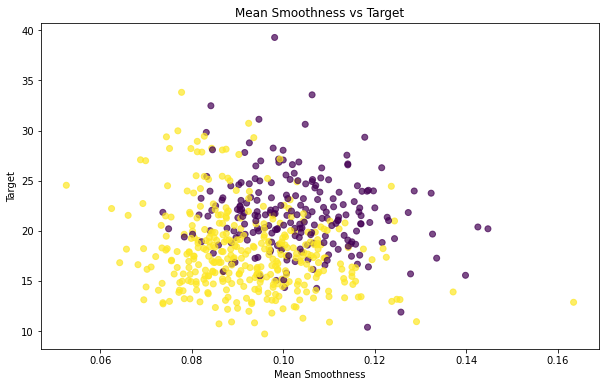

In [105]:
# Assuming 'smo' is one of the features in the dataset
smo_index = list(data1.feature_names).index('mean smoothness')
tex_index = list(data1.feature_names).index('mean texture')

# Plot the 'smo' feature
plt.figure(figsize=(10, 6))
plt.scatter(X[:, smo_index],X[:,tex_index],c=y, alpha=0.7)
# plt.plot(y, color='red', linewidth=2)
plt.xlabel('Mean Smoothness')   
plt.ylabel('Target')
plt.title('Mean Smoothness vs Target')

In [13]:
X[:5,:4]

array([[  17.99,   10.38,  122.8 , 1001.  ],
       [  20.57,   17.77,  132.9 , 1326.  ],
       [  19.69,   21.25,  130.  , 1203.  ],
       [  11.42,   20.38,   77.58,  386.1 ],
       [  20.29,   14.34,  135.1 , 1297.  ]])

In [14]:
y[:5]

array([0, 0, 0, 0, 0])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=43)

In [37]:
liner=LinearRegression()
liner.fit(X_train,y_train)
print(liner.score(X_train,y_train))
print(liner.score(X_test,y_test))
y_pred=liner.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_test,y_pred=y_pred))
print(median_absolute_error(y_test,y_pred=y_pred))

0.7819938770370946
0.7068897923550537
0.19036742463205197
0.06424640048170548
0.14774893874457717


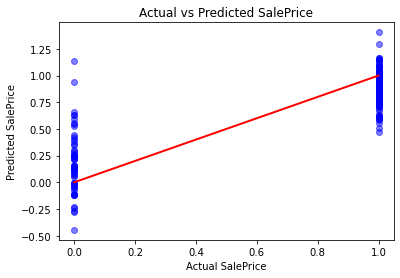

In [38]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()

In [39]:
lasso=Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
y_pred=lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_test,y_pred=y_pred))
print(median_absolute_error(y_test,y_pred=y_pred))

0.7208784973541021
0.7043249617803843
0.2079265243582274
0.06480858196829342
0.19360967413706176


c:\Users\AL-Renad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.291e+00, tolerance: 9.115e-03
  model = cd_fast.enet_coordinate_descent(


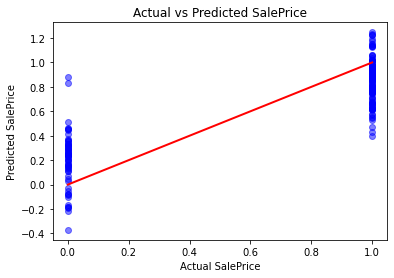

In [40]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()

In [41]:
rigde=Ridge(alpha=0.01)
rigde.fit(X_train,y_train)
print(rigde.score(X_train,y_train))
print(rigde.score(X_test,y_test))
y_pred=rigde.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_test,y_pred=y_pred))
print(median_absolute_error(y_test,y_pred=y_pred))

0.7743117572732906
0.7076643873943729
0.19195969831035256
0.06407661812063697
0.16370667959729657


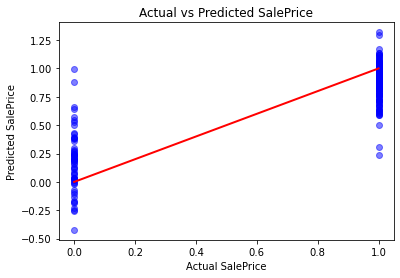

In [42]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
classif=LogisticRegression()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
print(classif.score(X_train,y_train))
print(classif.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.958005249343832
0.973404255319149
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        61
           1       0.98      0.98      0.98       127

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

[[ 58   3]
 [  2 125]]


c:\Users\AL-Renad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

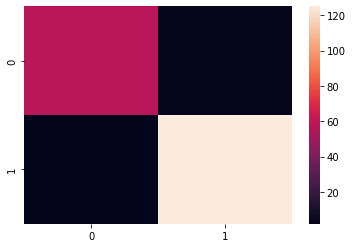

In [36]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
classif=DecisionTreeClassifier()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
print(classif.score(X_train,y_train))
print(classif.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
0.925531914893617
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        61
           1       0.97      0.92      0.94       127

    accuracy                           0.93       188
   macro avg       0.91      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188

[[ 57   4]
 [ 10 117]]


<AxesSubplot:>

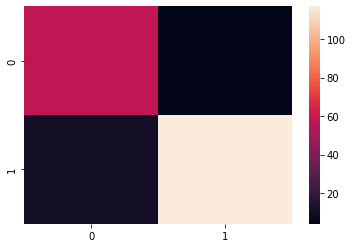

In [52]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
classif=SVC()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
print(classif.score(X_train,y_train))
print(classif.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9002624671916011
0.9414893617021277
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        61
           1       0.93      0.99      0.96       127

    accuracy                           0.94       188
   macro avg       0.95      0.91      0.93       188
weighted avg       0.94      0.94      0.94       188

[[ 51  10]
 [  1 126]]


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
classif=RandomForestClassifier()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
print(classif.score(X_train,y_train))
print(classif.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
0.973404255319149
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.98      0.98      0.98       127

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

[[ 59   2]
 [  3 124]]


<AxesSubplot:>

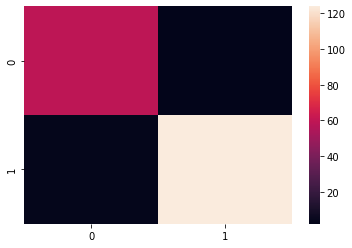

In [55]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [45]:
stscal=StandardScaler()
X=stscal.fit_transform(X)
X[:5,:4]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363],
       [-0.76890929,  0.25373211, -0.59268717, -0.76446379],
       [ 1.75029663, -1.15181643,  1.77657315,  1.82622928]])

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=43)

In [24]:
liner=LinearRegression()
liner.fit(X_train,y_train)
print(liner.score(X_train,y_train))
print(liner.score(X_test,y_test))
y_pred=liner.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_test,y_pred=y_pred))
print(median_absolute_error(y_test,y_pred=y_pred))

0.7819938770370948
0.706889792355061
0.19036742463204756
0.06424640048170387
0.14774893874456976


In [28]:
lasso=Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
y_pred=lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_test,y_pred=y_pred))
print(median_absolute_error(y_test,y_pred=y_pred))

0.754892242371827
0.7101107011278596
0.1990728787554783
0.06354041416824559
0.17339939151690492


In [26]:
rigde=Ridge(alpha=0.01)
rigde.fit(X_train,y_train)
print(rigde.score(X_train,y_train))
print(rigde.score(X_test,y_test))
y_pred=rigde.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_test,y_pred=y_pred))
print(median_absolute_error(y_test,y_pred=y_pred))

0.7819181672001037
0.7087529887967033
0.18999070023634712
0.06383800916115716
0.14700200051331935


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
classif=LogisticRegression()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
print(classif.score(X_train,y_train))
print(classif.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.989501312335958
0.9680851063829787
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        61
           1       0.98      0.98      0.98       127

    accuracy                           0.97       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188

[[ 58   3]
 [  3 124]]


<AxesSubplot:>

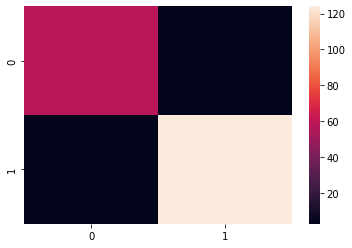

In [48]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

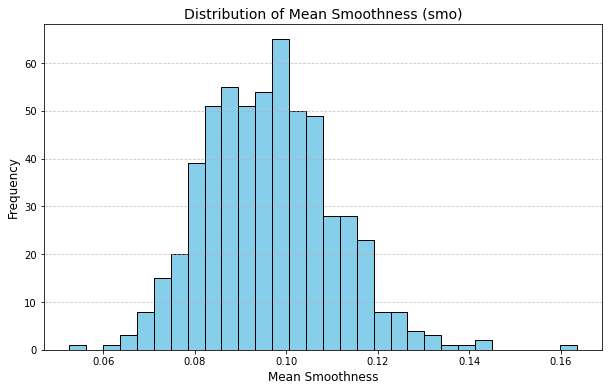

In [61]:
import matplotlib.pyplot as plt

# Assuming 'smo' is one of the features in the dataset
smo_index = list(data1.feature_names).index('mean smoothness')

# Plot the 'smo' feature
plt.figure(figsize=(10, 6))
plt.hist(X[:, smo_index], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Smoothness (smo)', fontsize=14)
plt.xlabel('Mean Smoothness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()